# Class exercises 2:

In [3]:
! wget https://github.com/mhemmg/ComputationalNumericalMethods/blob/master/extras/homeworks_originales_para_descargar/homework_07/imgs/homework_circuit.png

--2022-11-19 14:11:08--  https://github.com/mhemmg/ComputationalNumericalMethods/blob/master/extras/homeworks_originales_para_descargar/homework_07/imgs/homework_circuit.png
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘homework_circuit.png’

homework_circuit.pn     [ <=>                ] 140.13K   758KB/s    in 0.2s    

2022-11-19 14:11:08 (758 KB/s) - ‘homework_circuit.png’ saved [143492]



Consider a circuit:
<img src="/content/homework_circuit.png" width="700" />


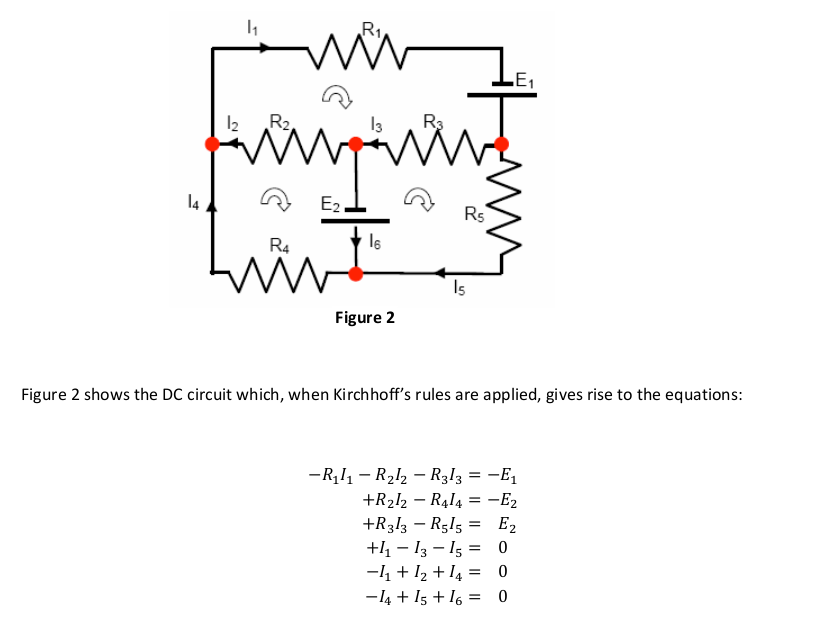

The set of linear equations comes from the Kirchhoff's rules (in case of doubts review the literature)

Find the currents $I_1 \cdots I_6$ knowing that the 

Resistances are:

$R_1=1 \Omega$,
$R_2=2 \Omega$,
$R_3=3 \Omega$,
$R_4=4 \Omega$,
$R_5=5 \Omega$

Voltages are:
$E_1=10 V$,
$E_2=40 V$

use python build in functions  `np.linalg.solve(A,b)`

In [4]:
import numpy as np
import scipy.linalg as la

Comenzamos por escribir el sistema de ecuaciones en su manera matricial. 
Si se considera un "vector" $I$ que almacena las corrientes, un "vector" $V$ que almacena los voltajes, y una matriz que depende exclusivamente de las características geométricas y resistencias del circuito, el mismo sistema de ecuaciones pero escrito en forma matricial está dado por

$A I = V$

en donde

$
I=\begin{equation}
\begin{bmatrix}
I_{1}\\
I_{2}\\
I_{3}\\
I_{4}\\
I_{5}\\
I_{6}
\end{bmatrix}
\end{equation}
$

$ 
A=\begin{equation}
\begin{bmatrix}
-R_{1} & -R_{2} & -R_{3} & 0 & 0 & 0\\
0 & R_{2} & 0 & -R_{4} & 0 & 0\\
0 & 0 & R_{3} & 0 & -R_{5} & 0\\
1 & 0 & -1 & 0 & -1 & 0\\
-1 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & -1 & 1 & 1
\end{bmatrix}
\end{equation} 
$

$ 
V=\begin{equation}
\begin{bmatrix}
-V_{1} \\
-V_{2}\\
V_{2} \\
0 \\
0 \\
0 
\end{bmatrix}
\end{equation}
$

Nótese que la matriz de coeficientes del sistema $A$ no varía aún cuando varien los voltajes aplicados. Esto se cumple mientras las corrientes que aparecen en el circuito no sean suficientes para rebasar los límites de comportamiento lineal de los componentes. 

Una vez planteado el problema desde un punto de vista matricial, consideramos ahora el problema de la existencia de soluciones para el problema. 

Se tendrá una solución única para las corrientes del circuito mientras la matriz A, formada por la geometría del circuito y los valores de las resistencias presentes en este, sea una matriz invertible. Verificamos si esto es cierto evaluando su determinante. Descartar un problema sin solución antes de comenzar a realizar mediciones, cálculos o modelos 

In [5]:
R1=1
R2=2
R3=3
R4=4
R5=5

V1=10
V2=40

A=np.array ( [[-R1,-R2,-R3,0,0,0],[0,R2,0,-R4,0,0],[0,0,R3,0,-R5,0],[1,0,-1,0,-1,0],[-1,1,0,1,0,0],[0,0,0,-1,1,1]] )

V=np.array([-V1, -V2, V2, 0,0,0])

print(A)

[[-1 -2 -3  0  0  0]
 [ 0  2  0 -4  0  0]
 [ 0  0  3  0 -5  0]
 [ 1  0 -1  0 -1  0]
 [-1  1  0  1  0  0]
 [ 0  0  0 -1  1  1]]


In [6]:
det = la.det(A)

if det!=0:
  print("El determinante de la matriz de coeficientes del sistema es no nulo, el sistema tiene una solución única. ")
else:
  print("El determinante de la matriz de coeficientes del sistema es nulo, por lo tanto el sistema carede de una solución única.  ")

El determinante de la matriz de coeficientes del sistema es no nulo, el sistema tiene una solución única. 


Así que ahora que está comprobado que el sistema tiene solución, procedemos a determinarla

In [7]:
I = np.linalg.solve(A,V)

print(I)

print("Los valores obtenidos para las corrientes en el circuito son: ")
for i in range(0,len(I), 1):
  print(f" I{i+1} =", I[i], "A" )

[ 1.98019802 -5.34653465  6.23762376  7.32673267 -4.25742574 11.58415842]
Los valores obtenidos para las corrientes en el circuito son: 
 I1 = 1.9801980198019784 A
 I2 = -5.346534653465348 A
 I3 = 6.237623762376239 A
 I4 = 7.326732673267325 A
 I5 = -4.257425742574257 A
 I6 = 11.584158415841582 A


Es entonces la solución buscada. Para verificar su validez se sustituyen estos valores en el sistema de ecuaciones original. 

In [8]:
print(A@I)
print(V)

[-1.00000000e+01 -4.00000000e+01  4.00000000e+01 -3.55271368e-15
 -8.88178420e-16  0.00000000e+00]
[-10 -40  40   0   0   0]


Estos dos vectores deberían ser iguales ante una solución teórica, en este caso, la solución es una aproximación numérica, por lo cual la manera más adecuada de compararlos es a traves de una tolerancia determinada. 
En particular, en este caso, tal como puede verse, los números que deberían ser cero lo son casi hasta la 15ava cifra significativa. 
Una manera de realizar esta comparación sin confiar estrictamente en un criterio de evaluación visual es la siguiente

In [9]:
error = np.linalg.norm( A@I - V )

if error <= 1e-12 :
  print("Los valores obtenidos para las corrientes satisfacen el sistema de ecuaciones con una precisión de hasta 12 cifras significativas. ")
else:
  print("Es recomendable estimar las cifras significativas de estos resultados (hasta que decimal es recomendable tomar estas soluciones)")

Los valores obtenidos para las corrientes satisfacen el sistema de ecuaciones con una precisión de hasta 12 cifras significativas. 


Esto es entonces una solución bastante satisfactoria al problema propuesto. 

Sin embargo, como buen electronicman, puedo aún hacer algo más para mostrar cuan correcta es realmente esta solución obtenida. 

Tal como dirías en profe, profe Michal, efectivamente un circuito como tal yo podría resolverlo, y a través de mis métodos, las soluciones teóricas para este problema son 

$ I_{1}=200/101 $

$ I_{2}=-540/101$

$ I_{3}=630/101$

$ I_{4}=740/101$

$ I_{5}=-430/101$

$ I_{6}=1170/101$

Así que es posible estimar el verdadero error absoluto al comparar la solución obtenida computacionalmente con la solución teórica

In [11]:
I_teo=np.zeros(6)

I_teo[0]=200/101
I_teo[1]=-540/101
I_teo[2]=630/101
I_teo[3]=740/101
I_teo[4]=-430/101
I_teo[5]=1170/101

error_absoluto = I_teo - I

print(error_absoluto)

[ 1.77635684e-15  8.88178420e-16 -8.88178420e-16  1.77635684e-15
 -8.88178420e-16  1.77635684e-15]


Estos "ceros" del orden de la 15ava cifra significativa expresan que los resultados obtenidos, tienen una precisión incluso mayor de la precisión mínima que se estimó al sustituirlos en la ecuación diferencial. 

Sin embargo debe tenerse en cuenta que no siempre existirán las soluciones teóricas para realizar comparaciones, por lo cual lo adecuado será siempre EVALUAR las soluciones obtenidas en LA ECUACIÓN QUE DEFINE EL PROBLEMA. 
las soluciones obtenidas, si han sido adecuadamente calculadas, deberán ser coherentes con los resultados esperados una vez se sustituyen en la ecuación diferencial.

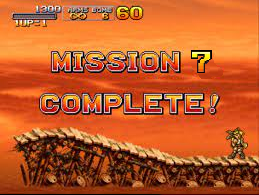